In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]
single_image.shape

(28, 28)

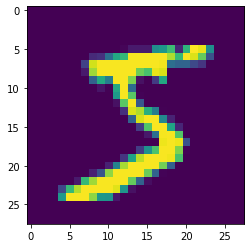

In [8]:
plt.imshow(single_image);

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train.shape # 60000 labeled numbers. Need to one hot encode

(60000,)

In [13]:
y_example = to_categorical(y_train) # one hot encode the target
print(y_example.shape)
print(y_example)
print("Representation of target for 1 image after one hot encoding: ")
print(y_example[0])

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Representation of target for 1 image after one hot encoding: 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
y_cat_test = to_categorical(y_test) # num classes is inferred based on number of unique values
y_cat_train = to_categorical(y_train, 10) # test with explicitly defining num classes


In [15]:
x_train = x_train / 255 # alternative is min/max scaler. Not needed because range of possible values for image does not change
x_test = x_test/255

In [16]:
scaled_image = x_train[0]
scaled_image.max()

1.0

In [17]:
x_train.shape

(60000, 28, 28)

In [19]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()
# kernel_size = filter size
# padding: valid, apply no padding. same, apply padding if needed, ensure output dimensions same as input.
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
# flatten: turn 28*28 image into 784 vector
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# 10 neurons, corresponding to 10 classes in output layer. softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

# keras.io/metrics for available metrics

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
model.fit(x_train, y_cat_train, epochs=9999, validation_data=(x_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/9999
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1341 - accuracy: 0.9596 - val_loss: 0.0553 - val_accuracy: 0.9815

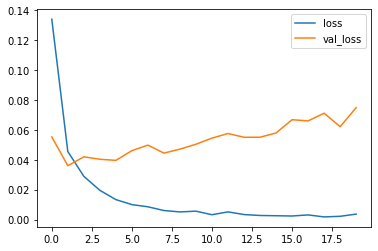

In [25]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot();

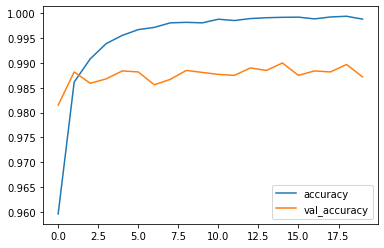

In [26]:
metrics[['accuracy', 'val_accuracy']].plot();


In [27]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.07487160712480545, 0.9872000217437744]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)
y_cat_test.shape

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(10000, 10)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [30]:
confusion_matrix(y_test, predictions)

array([[ 976,    1,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1125,    1,    3,    2,    0,    2,    1,    1,    0],
       [   2,    1, 1018,    2,    2,    0,    1,    5,    1,    0],
       [   0,    0,    0,  998,    0,    8,    0,    2,    2,    0],
       [   0,    0,    0,    0,  976,    0,    0,    0,    0,    6],
       [   0,    0,    0,    5,    0,  885,    1,    0,    1,    0],
       [   2,    2,    0,    0,    5,    4,  945,    0,    0,    0],
       [   0,    3,    3,    2,    3,    0,    0, 1013,    1,    3],
       [   3,    2,    2,    1,    0,    2,    2,    1,  956,    5],
       [   0,    1,    0,    3,   12,    7,    0,    6,    0,  980]],
      dtype=int64)

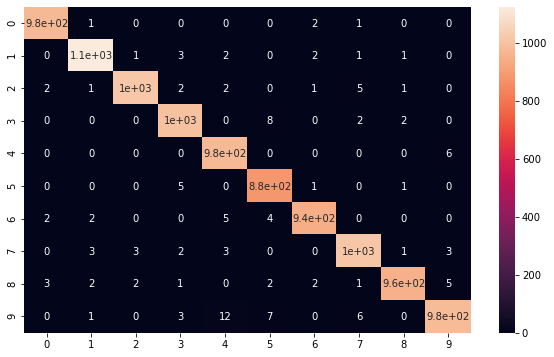

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

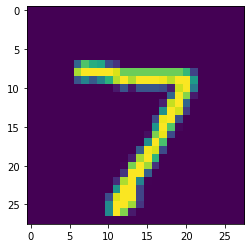

In [33]:
my_number = x_test[0]

plt.imshow(my_number.reshape(28, 28));

In [34]:
# num_images, width, height, color_channels
model.predict_classes(my_number.reshape(1, 28, 28, 1))

array([7], dtype=int64)